ชื่อ - สกุล: นายวทัญญู เพ็ชรพญา (Wathunyu Phetpaya)

รหัสนักศึกษา: 6710120039

In [771]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymssql
import time
from functools import wraps

In [772]:
pd.set_option('display.max_rows', None)

In [773]:
def time_measure(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Function '{func.__name__}' executed in {elapsed_time:.6f} seconds")
        return result
    return wrapper

In [774]:
class MSSQLConnector:
    def __init__(self, server, database, username, password):
        self.server = server
        self.database = database
        self.username = username
        self.password = password
        self.connection = None

    @time_measure
    def connect(self):
        """Establish a connection to the SQL Server database."""
        try:
            self.connection = pymssql.connect(
                server=self.server,
                user=self.username,
                password=self.password,
                database=self.database,
                charset='UTF-8'
            )
            print("Connection successful")
        except Exception as e:
            print(f"Error connecting to MSSQL: {e}")

    @time_measure
    def execute_query(self, query):
        """Execute a query and return the results."""
        if not self.connection:
            print("No connection available.")
            return None
        try:
            cursor = self.connection.cursor()
            cursor.execute(query)
            result = cursor.fetchall()
            columns = [column[0] for column in cursor.description]

            data = []
            for row in result:
                data.append([item.decode('utf-8') if isinstance(item, bytes) else item for item in row])

            df = pd.DataFrame(data, columns=columns)
            return df
        except Exception as e:
            print(f"Error executing query: {e}")
            return None

    @time_measure
    def insert_dataframe(self, table, dataframe):
        """Insert records from a DataFrame into the specified table.

        Args:
            table (str): Name of the table to insert into.
            dataframe (pd.DataFrame): DataFrame containing the data to insert.
        """
        if not self.connection:
            print("No connection available.")
            return
        
        if dataframe.empty:
            print("DataFrame is empty. No data to insert.")
            return

        # Prepare the INSERT SQL statement
        columns = ', '.join(dataframe.columns)
        placeholders = ', '.join(['%s'] * len(dataframe.columns))
        sql = f"INSERT INTO {table} ({columns}) VALUES ({placeholders})"
        
        try:
            cursor = self.connection.cursor()
            for index, row in dataframe.iterrows():
                cursor.execute(sql, tuple(row))
            self.connection.commit()
            print(f"Inserted {len(dataframe)} records into {table} successfully.")
        except Exception as e:
            print(f"Error inserting DataFrame: {e}")

    @time_measure
    def close(self):
        """Close the database connection."""
        if self.connection:
            self.connection.close()
            print("Connection closed")

In [775]:
if __name__ == "__main__":
    server = '10.0.1.190' # '192.168.1.9'
    database = 'coop'
    username = 'sa'
    password = 'qwerty123$'

    # Create a database server connection
    mssql = MSSQLConnector(server, database, username, password)
    mssql.connect()

    # Define the SQL query
    query = "SELECT * FROM receipt"
    df_receipt = mssql.execute_query(query)
    query = "SELECT * FROM contract"
    df_contract = mssql.execute_query(query)
    query = "SELECT * FROM member"
    df_member = mssql.execute_query(query)
    # Remove columns
    columns_to_remove = ['mast_name', 'mast_fname', 'mast_addr', 'mast_addr2', 'mast_memo', 'mast_marry_name', 'mast_tel', 'mast_eng_name', 'mast_eng_lname', 'mast_image', 'mast_email']
    columns_to_remove_upper = [col.upper() for col in columns_to_remove]
    df_member = df_member.drop(columns=columns_to_remove_upper)

    # Close the connection
    mssql.close()

Connection successful
Function 'connect' executed in 0.038131 seconds
Function 'execute_query' executed in 1.060397 seconds
Function 'execute_query' executed in 0.016317 seconds
Function 'execute_query' executed in 0.014918 seconds
Connection closed
Function 'close' executed in 0.000121 seconds


In [776]:
print(df_receipt.head(5))

       PAY_ID PAY_MEMB_NO PAY_TYPE    PAY_DOC_NO PAY_SAVING_DOC_NO  PAY_DATE  \
0  1501000492          49        2  2015M1001394              NULL  20150105   
1  1501001500         150        0                            NULL  20150105   
2  1501002720         272        0                            NULL  20150105   
3  1501003242         324        2  2015M1001413              NULL  20150105   
4  1501003772         377        2  2015M1001420              NULL  20150105   

  PAY_DUE_DATE PAY_OP_CODE1 PAY_OP_CODE2 PAY_ACC_NO  ...  PAY_OLD_BAL  \
0     20150127          132          132             ...        81376   
1     20150127          132                          ...       259888   
2     20150127          132          132             ...       120000   
3     20150127          132          132             ...       330200   
4     20150127          132          132   11009357  ...       661050   

   PAY_ACCU_INT  PAY_PROM_STS  PAY_PROM_INT  PAY_RINT_AMT  PAY_DESC  \
0        

In [777]:
print(df_receipt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35151 entries, 0 to 35150
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PAY_ID             35151 non-null  object
 1   PAY_MEMB_NO        35151 non-null  object
 2   PAY_TYPE           35151 non-null  object
 3   PAY_DOC_NO         35151 non-null  object
 4   PAY_SAVING_DOC_NO  35151 non-null  object
 5   PAY_DATE           35151 non-null  object
 6   PAY_DUE_DATE       35151 non-null  object
 7   PAY_OP_CODE1       35151 non-null  object
 8   PAY_OP_CODE2       35151 non-null  object
 9   PAY_ACC_NO         35151 non-null  object
 10  PAY_OLD_SHR        35151 non-null  int64 
 11  PAY_OLD_INT        35151 non-null  int64 
 12  PAY_SAVE_STS       35151 non-null  int64 
 13  PAY_BANK_TYPE      35151 non-null  int64 
 14  PAY_MEMB_DEPT      35151 non-null  int64 
 15  PAY_USER_ID        35151 non-null  int64 
 16  PAY_FINE_AMT       35151 non-null  objec

In [778]:
print(df_receipt.describe())

        PAY_OLD_SHR    PAY_OLD_INT  PAY_SAVE_STS  PAY_BANK_TYPE  \
count  3.515100e+04   35151.000000  35151.000000   35151.000000   
mean   6.538318e+05    8883.410913      0.630992       0.033513   
std    5.784030e+05   13842.165275      0.482543       0.179973   
min    1.146500e+05       0.000000      0.000000       0.000000   
25%    3.253600e+05       0.000000      0.000000       0.000000   
50%    4.272100e+05    4082.000000      1.000000       0.000000   
75%    6.635500e+05   11203.000000      1.000000       0.000000   
max    3.667410e+06  152899.000000      1.000000       1.000000   

       PAY_MEMB_DEPT   PAY_USER_ID      PAY_ITEM  PAY_PROM_TYPE      PAY_PERD  \
count   35151.000000  35151.000000  35151.000000   35151.000000  35151.000000   
mean     1326.150266    142.523257      1.949361       3.180621    214.310802   
std       619.322116     26.250161      1.386091       3.410394    244.574295   
min      1101.000000     22.000000      1.000000       0.000000      0.0

In [779]:
print(df_contract.head(5))

   PROM_MEMB_NO  PROM_LOAN_TYPE  PROM_YY  PROM_NO  PROM_LOAN_BRH  \
0            24               3     2006     1319              1   
1            50               3     2007     1167              1   
2           132               3     2016      698              1   
3           237               3     2022     1543              1   
4           280               3     2019      316              1   

   PROM_LOAN_YMD  PROM_LOAN_AMT  PROM_LOAN_PERD  PROM_LOAN_PERD_AMT  \
0       20061219         259957             300                   0   
1       20071126         185000             239                1490   
2       20160523         231594             300                   0   
3       20221207         332509             300                   0   
4       20190313         191000             300                   0   

   PROM_LAST_YMD  ...  PROM_START_PAY  PROM_IS_CANCEL  PROM_PAID_MONTH_AMT  \
0       20180423  ...            NULL            NULL                    0   
1       

In [780]:
print(df_contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PROM_MEMB_NO             500 non-null    int64 
 1   PROM_LOAN_TYPE           500 non-null    int64 
 2   PROM_YY                  500 non-null    int64 
 3   PROM_NO                  500 non-null    int64 
 4   PROM_LOAN_BRH            500 non-null    int64 
 5   PROM_LOAN_YMD            500 non-null    int64 
 6   PROM_LOAN_AMT            500 non-null    int64 
 7   PROM_LOAN_PERD           500 non-null    int64 
 8   PROM_LOAN_PERD_AMT       500 non-null    int64 
 9   PROM_LAST_YMD            500 non-null    int64 
 10  PROM_PAID_AMT            500 non-null    int64 
 11  PROM_PAID_INT            500 non-null    int64 
 12  PROM_PAID_PERD           500 non-null    int64 
 13  PROM_PAID_TIME           500 non-null    int64 
 14  PROM_PAID_STS            500 non-null    i

In [781]:
print(df_contract.describe())

       PROM_MEMB_NO  PROM_LOAN_TYPE      PROM_YY      PROM_NO  PROM_LOAN_BRH  \
count    500.000000      500.000000   500.000000   500.000000     500.000000   
mean     417.514000        2.756000  2014.440000   779.568000       1.342000   
std      230.675096        0.526325     5.362454   623.371592       0.763021   
min       11.000000        1.000000  1995.000000     5.000000       1.000000   
25%      277.000000        3.000000  2011.000000   251.000000       1.000000   
50%      385.000000        3.000000  2015.000000   595.500000       1.000000   
75%      637.250000        3.000000  2019.000000  1211.750000       1.000000   
max      767.000000        3.000000  2023.000000  2807.000000       5.000000   

       PROM_LOAN_YMD  PROM_LOAN_AMT  PROM_LOAN_PERD  PROM_LOAN_PERD_AMT  \
count   5.000000e+02   5.000000e+02      500.000000          500.000000   
mean    2.014520e+07   3.764645e+05      154.328000         2557.960000   
std     5.366990e+04   6.398084e+05      134.170772   

In [782]:
print(df_member.head(5))

   MAST_MEMB_NO MAST_MEMB_DEPT MAST_DEPT_BRH MAST_ZIP MAST_BIRTH_YMD  \
0         726.0           1151             2    90110       19461121   
1         727.0           1153             2    90110       19530520   
2         729.0           1156             4    90000       19540719   
3         734.0           1156             2    50230       19520131   
4         735.0           3450            36    94000       19460717   

  MAST_MARRY_STS MAST_YMD_IN MAST_YMD_OUT MAST_SALARY MAST_MEMB_TYPE  ...  \
0              2    19770630                        0              4  ...   
1              4    19770731                 15088.27              º  ...   
2              1    19770731                  24640.2              º  ...   
3              4    19770831                  34742.4              º  ...   
4              2    19770831     20211111           0              4  ...   

  MAST_RETIRE_SALARY MAST_INC_AMT MAST_BLOOD_GROUP MAST_SALARY_DEP  \
0                  0         NULL 

In [783]:
print(df_member.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 86 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAST_MEMB_NO         150 non-null    float64
 1   MAST_MEMB_DEPT       151 non-null    object 
 2   MAST_DEPT_BRH        151 non-null    object 
 3   MAST_ZIP             151 non-null    object 
 4   MAST_BIRTH_YMD       151 non-null    object 
 5   MAST_MARRY_STS       151 non-null    object 
 6   MAST_YMD_IN          151 non-null    object 
 7   MAST_YMD_OUT         151 non-null    object 
 8   MAST_SALARY          151 non-null    object 
 9   MAST_MEMB_TYPE       151 non-null    object 
 10  MAST_MONTH_SHR       151 non-null    object 
 11  MAST_PAID_TYPE       151 non-null    object 
 12  MAST_REC_STS         151 non-null    object 
 13  MAST_PAID_COND       151 non-null    object 
 14  MAST_PAID_LAST       151 non-null    object 
 15  MAST_PAID_TIME       151 non-null    obj

In [784]:
print(df_member.describe())

       MAST_MEMB_NO  MAST_MEMB_ID
count    150.000000  1.510000e+02
mean     412.400000  5.695683e+06
std      232.738353  6.990703e+07
min       11.000000  0.000000e+00
25%      207.250000  0.000000e+00
50%      419.500000  0.000000e+00
75%      620.750000  0.000000e+00
max      767.000000  8.590381e+08


In [785]:
print(df_receipt.isnull().sum())

PAY_ID               0
PAY_MEMB_NO          0
PAY_TYPE             0
PAY_DOC_NO           0
PAY_SAVING_DOC_NO    0
PAY_DATE             0
PAY_DUE_DATE         0
PAY_OP_CODE1         0
PAY_OP_CODE2         0
PAY_ACC_NO           0
PAY_OLD_SHR          0
PAY_OLD_INT          0
PAY_SAVE_STS         0
PAY_BANK_TYPE        0
PAY_MEMB_DEPT        0
PAY_USER_ID          0
PAY_FINE_AMT         0
PAY_OVER_AMT         0
PAY_PRINT_DATE       0
PAY_PRINT_OP_CODE    0
POST_DATETIME        0
PAY_ITEM             0
PAY_PROM_TYPE        0
PAY_PROM_YY          0
PAY_PROM_NO          0
PAY_PROM_BRH         0
PAY_PERD             0
PAY_AMT1             0
PAY_AMT2             0
PAY_RECV_AMT1        0
PAY_RECV_AMT2        0
PAY_MONTH_AMT1       0
PAY_MONTH_AMT2       0
PAY_ACC_AMT1         0
PAY_ACC_AMT2         0
PAY_RET_AMT2         0
PAY_OLD_BAL          0
PAY_ACCU_INT         0
PAY_PROM_STS         0
PAY_PROM_INT         0
PAY_RINT_AMT         0
PAY_DESC             0
PAY_REF_NO           0
PAY_REF_ID 

In [786]:
print(df_contract.isnull().sum())

PROM_MEMB_NO               0
PROM_LOAN_TYPE             0
PROM_YY                    0
PROM_NO                    0
PROM_LOAN_BRH              0
PROM_LOAN_YMD              0
PROM_LOAN_AMT              0
PROM_LOAN_PERD             0
PROM_LOAN_PERD_AMT         0
PROM_LAST_YMD              0
PROM_PAID_AMT              0
PROM_PAID_INT              0
PROM_PAID_PERD             0
PROM_PAID_TIME             0
PROM_PAID_STS              0
PROM_CODERATE              0
PROM_COND_TYPE             0
PROM_PERD_AMT              0
PROM_REAL_AMT              0
PROM_RECV_AMT              0
PROM_RECV_YMD              0
PROM_RECV_TIME             0
PROM_REASON                0
PROM_WITH_MEMBNO           0
PROM_WITH_TYPE             0
PROM_INT_YMD               0
PROM_ACCU_INT              0
PROM_SPEC_TYPE             0
PROM_AMT_YMD               0
PROM_RET_INT               0
PROM_NPAY_INT              0
PROM_REQ_STS               0
PROM_PAY_STS               0
PROM_DUE_DATE              0
PROM_CHK_RIGHT

In [787]:
# Before Drop NA
print(df_member.isnull().sum())

MAST_MEMB_NO           1
MAST_MEMB_DEPT         0
MAST_DEPT_BRH          0
MAST_ZIP               0
MAST_BIRTH_YMD         0
MAST_MARRY_STS         0
MAST_YMD_IN            0
MAST_YMD_OUT           0
MAST_SALARY            0
MAST_MEMB_TYPE         0
MAST_MONTH_SHR         0
MAST_PAID_TYPE         0
MAST_REC_STS           0
MAST_PAID_COND         0
MAST_PAID_LAST         0
MAST_PAID_TIME         0
MAST_PAID_PERD         0
MAST_PAID_AMT          0
MAST_PAID_SHR          0
MAST_RECV_STS          0
MAST_RET_STS           0
MAST_INT_COMM          0
MAST_INT_EMRG          0
MAST_INT_SPEC          0
MAST_ACCU_DIVD         0
MAST_MEMB_ID           0
MAST_CLEAR_YMD         0
MAST_CLEAR_AMT         0
MAST_CHANGE_YMD        0
MAST_OLD_INT           0
MAST_MEMB_FLAG         0
MAST_GUARANTEE         0
MAST_PAIDDIVD_STS      0
MAST_GUAR_STS          0
MAST_OUT_STS           0
MAST_CARD_ID           0
MAST_PAY_STS           0
MAST_MARRY_MEMBNO      0
MAST_PROM_HOME         0
MAST_RIGHT_TYPE        0


In [788]:
df_member = df_member.dropna(subset=['MAST_MEMB_NO'])

In [789]:
# After Drop NA
print(df_member.isnull().sum())

MAST_MEMB_NO           0
MAST_MEMB_DEPT         0
MAST_DEPT_BRH          0
MAST_ZIP               0
MAST_BIRTH_YMD         0
MAST_MARRY_STS         0
MAST_YMD_IN            0
MAST_YMD_OUT           0
MAST_SALARY            0
MAST_MEMB_TYPE         0
MAST_MONTH_SHR         0
MAST_PAID_TYPE         0
MAST_REC_STS           0
MAST_PAID_COND         0
MAST_PAID_LAST         0
MAST_PAID_TIME         0
MAST_PAID_PERD         0
MAST_PAID_AMT          0
MAST_PAID_SHR          0
MAST_RECV_STS          0
MAST_RET_STS           0
MAST_INT_COMM          0
MAST_INT_EMRG          0
MAST_INT_SPEC          0
MAST_ACCU_DIVD         0
MAST_MEMB_ID           0
MAST_CLEAR_YMD         0
MAST_CLEAR_AMT         0
MAST_CHANGE_YMD        0
MAST_OLD_INT           0
MAST_MEMB_FLAG         0
MAST_GUARANTEE         0
MAST_PAIDDIVD_STS      0
MAST_GUAR_STS          0
MAST_OUT_STS           0
MAST_CARD_ID           0
MAST_PAY_STS           0
MAST_MARRY_MEMBNO      0
MAST_PROM_HOME         0
MAST_RIGHT_TYPE        0


In [790]:
@time_measure
def receipt_clean1(df_receipt):
    df_receipt.drop_duplicates(inplace=True)
    df_receipt = df_receipt.replace("NULL", None)
    df_receipt = df_receipt.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    return df_receipt

In [791]:
@time_measure
def contract_clean1(df_contract):
    df_contract.drop_duplicates(inplace=True)
    df_contract = df_contract.replace("NULL", None)
    df_contract['PROM_PERD_AMT_ADD_NEXT'] = df_contract['PROM_PERD_AMT_ADD_NEXT'].str.strip().replace('', None)
    df_contract = df_contract.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    return df_contract

In [792]:
@time_measure
def member_clean1(df_member):
    df_member.drop_duplicates(inplace=True)
    df_member = df_member.replace("NULL", None)
    columns_to_clean = ['MAST_PAID_AMT', 'MAST_PAID_SHR', 'MAST_SAL_TO_COOP', 'MAST_SAL_TO_BANK', 'MAST_REP_PAY_AMT', 'MAST_RETIRE_SALARY', 'MAST_FINE_AMT']
    df_member[columns_to_clean] = df_member[columns_to_clean].apply(lambda x: x.str.strip().replace('', None))
    df_member = df_member.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    return df_member

In [793]:
df_receipt = receipt_clean1(df_receipt)

Function 'receipt_clean1' executed in 0.575989 seconds


In [794]:
df_contract = contract_clean1(df_contract)

Function 'contract_clean1' executed in 0.022936 seconds


In [795]:
df_member = member_clean1(df_member)

Function 'member_clean1' executed in 0.021497 seconds


In [796]:
# Before NULL cleansing
print(df_receipt.isnull().sum())

PAY_ID                   0
PAY_MEMB_NO              0
PAY_TYPE                 0
PAY_DOC_NO               0
PAY_SAVING_DOC_NO    30768
PAY_DATE                 0
PAY_DUE_DATE             0
PAY_OP_CODE1             0
PAY_OP_CODE2             0
PAY_ACC_NO               0
PAY_OLD_SHR              0
PAY_OLD_INT              0
PAY_SAVE_STS             0
PAY_BANK_TYPE            0
PAY_MEMB_DEPT            0
PAY_USER_ID              0
PAY_FINE_AMT         34670
PAY_OVER_AMT         33782
PAY_PRINT_DATE        2060
PAY_PRINT_OP_CODE     2060
POST_DATETIME        28987
PAY_ITEM                 0
PAY_PROM_TYPE            0
PAY_PROM_YY              0
PAY_PROM_NO              0
PAY_PROM_BRH             0
PAY_PERD                 0
PAY_AMT1                 0
PAY_AMT2                 0
PAY_RECV_AMT1            0
PAY_RECV_AMT2            0
PAY_MONTH_AMT1           0
PAY_MONTH_AMT2           0
PAY_ACC_AMT1             0
PAY_ACC_AMT2             0
PAY_RET_AMT2             0
PAY_OLD_BAL              0
P

In [797]:
# NULL cleansing
@time_measure
def receipt_clean2(df_receipt):
    df_receipt['PAY_SAVING_DOC_NO'] = pd.to_numeric(df_receipt['PAY_SAVING_DOC_NO'], errors='coerce')
    df_receipt['PAY_SAVING_DOC_NO'] = df_receipt['PAY_SAVING_DOC_NO'].fillna(0).astype(int)
    # ------------
    df_receipt['PAY_FINE_AMT'] = df_receipt['PAY_FINE_AMT'].astype(float)
    df_receipt['PAY_FINE_AMT'] = df_receipt['PAY_FINE_AMT'].fillna(0).astype(float)
    # ------------
    df_receipt['PAY_OVER_AMT'] = df_receipt['PAY_OVER_AMT'].astype(float)
    df_receipt['PAY_OVER_AMT'] = df_receipt['PAY_OVER_AMT'].fillna(0).astype(float)
    # ------------
    df_receipt['PAY_PRINT_DATE'] = pd.to_numeric(df_receipt['PAY_PRINT_DATE'], errors='coerce')
    df_receipt['PAY_PRINT_DATE'] = df_receipt['PAY_PRINT_DATE'].fillna(0).astype(int)
    # ------------
    df_receipt['PAY_PRINT_OP_CODE'] = pd.to_numeric(df_receipt['PAY_PRINT_OP_CODE'], errors='coerce')
    df_receipt['PAY_PRINT_OP_CODE'] = df_receipt['PAY_PRINT_OP_CODE'].fillna(0).astype(int)
    # ------------
    df_receipt['POST_DATETIME'] = pd.to_numeric(df_receipt['POST_DATETIME'], errors='coerce')
    df_receipt['POST_DATETIME'] = df_receipt['POST_DATETIME'].fillna(0).astype(int)
    # ------------
    df_receipt['PAY_PROM_INT'] = pd.to_numeric(df_receipt['PAY_PROM_INT'], errors='coerce')
    df_receipt['PAY_PROM_INT'] = df_receipt['PAY_PROM_INT'].fillna(0).astype(int)
    # ------------
    df_receipt['PAY_RINT_AMT'] = pd.to_numeric(df_receipt['PAY_RINT_AMT'], errors='coerce')
    df_receipt['PAY_RINT_AMT'] = df_receipt['PAY_RINT_AMT'].fillna(0).astype(int)
    # ------------
    df_receipt['PAY_DESC'] = df_receipt['PAY_DESC'].astype(str)
    # ------------
    df_receipt['PAY_REF_NO'] = pd.to_numeric(df_receipt['PAY_REF_NO'], errors='coerce')
    df_receipt['PAY_REF_NO'] = df_receipt['PAY_REF_NO'].fillna(0).astype(int)
    # ------------
    df_receipt['PAY_REF_ID'] = pd.to_numeric(df_receipt['PAY_REF_ID'], errors='coerce')
    df_receipt['PAY_REF_ID'] = df_receipt['PAY_REF_ID'].fillna(0).astype(int)
    # ------------
    df_receipt['PAY_PERD_AMT'] = pd.to_numeric(df_receipt['PAY_PERD_AMT'], errors='coerce')
    df_receipt['PAY_PERD_AMT'] = df_receipt['PAY_PERD_AMT'].fillna(0).astype(int)
    # ------------
    df_receipt['PAY_COND_TYPE'] = pd.to_numeric(df_receipt['PAY_COND_TYPE'], errors='coerce')
    df_receipt['PAY_COND_TYPE'] = df_receipt['PAY_COND_TYPE'].fillna(0).astype(int)
    return df_receipt

In [798]:
df_receipt = receipt_clean2(df_receipt)

Function 'receipt_clean2' executed in 0.081708 seconds


In [799]:
# After NULL cleansing
print(df_receipt.isnull().sum())

PAY_ID               0
PAY_MEMB_NO          0
PAY_TYPE             0
PAY_DOC_NO           0
PAY_SAVING_DOC_NO    0
PAY_DATE             0
PAY_DUE_DATE         0
PAY_OP_CODE1         0
PAY_OP_CODE2         0
PAY_ACC_NO           0
PAY_OLD_SHR          0
PAY_OLD_INT          0
PAY_SAVE_STS         0
PAY_BANK_TYPE        0
PAY_MEMB_DEPT        0
PAY_USER_ID          0
PAY_FINE_AMT         0
PAY_OVER_AMT         0
PAY_PRINT_DATE       0
PAY_PRINT_OP_CODE    0
POST_DATETIME        0
PAY_ITEM             0
PAY_PROM_TYPE        0
PAY_PROM_YY          0
PAY_PROM_NO          0
PAY_PROM_BRH         0
PAY_PERD             0
PAY_AMT1             0
PAY_AMT2             0
PAY_RECV_AMT1        0
PAY_RECV_AMT2        0
PAY_MONTH_AMT1       0
PAY_MONTH_AMT2       0
PAY_ACC_AMT1         0
PAY_ACC_AMT2         0
PAY_RET_AMT2         0
PAY_OLD_BAL          0
PAY_ACCU_INT         0
PAY_PROM_STS         0
PAY_PROM_INT         0
PAY_RINT_AMT         0
PAY_DESC             0
PAY_REF_NO           0
PAY_REF_ID 

In [800]:
# Before NULL cleansing
print(df_contract.isnull().sum())

PROM_MEMB_NO                 0
PROM_LOAN_TYPE               0
PROM_YY                      0
PROM_NO                      0
PROM_LOAN_BRH                0
PROM_LOAN_YMD                0
PROM_LOAN_AMT                0
PROM_LOAN_PERD               0
PROM_LOAN_PERD_AMT           0
PROM_LAST_YMD                0
PROM_PAID_AMT                0
PROM_PAID_INT                0
PROM_PAID_PERD               0
PROM_PAID_TIME               0
PROM_PAID_STS                0
PROM_CODERATE                0
PROM_COND_TYPE               0
PROM_PERD_AMT                0
PROM_REAL_AMT                0
PROM_RECV_AMT                0
PROM_RECV_YMD                0
PROM_RECV_TIME               0
PROM_REASON                  0
PROM_WITH_MEMBNO            76
PROM_WITH_TYPE              76
PROM_INT_YMD                 0
PROM_ACCU_INT                0
PROM_SPEC_TYPE             397
PROM_AMT_YMD                 0
PROM_RET_INT                 0
PROM_NPAY_INT                0
PROM_REQ_STS                 0
PROM_PAY

In [801]:
# NULL cleansing
@time_measure
def contract_clean2(df_contract):
    df_contract['PROM_SPEC_TYPE'] = pd.to_numeric(df_contract['PROM_SPEC_TYPE'], errors='coerce')
    df_contract['PROM_SPEC_TYPE'] = df_contract['PROM_SPEC_TYPE'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_DUE_DATE'] = pd.to_numeric(df_contract['PROM_DUE_DATE'], errors='coerce')
    df_contract['PROM_DUE_DATE'] = df_contract['PROM_DUE_DATE'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_CHK_RIGHT'] = pd.to_numeric(df_contract['PROM_CHK_RIGHT'], errors='coerce')
    df_contract['PROM_CHK_RIGHT'] = df_contract['PROM_CHK_RIGHT'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_IS_CALL_AVG_INT'] = pd.to_numeric(df_contract['PROM_IS_CALL_AVG_INT'], errors='coerce')
    df_contract['PROM_IS_CALL_AVG_INT'] = df_contract['PROM_IS_CALL_AVG_INT'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_IS_CALL_ACCUED_INT'] = pd.to_numeric(df_contract['PROM_IS_CALL_ACCUED_INT'], errors='coerce')
    df_contract['PROM_IS_CALL_ACCUED_INT'] = df_contract['PROM_IS_CALL_ACCUED_INT'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_STOP_AMT_STS'] = pd.to_numeric(df_contract['PROM_STOP_AMT_STS'], errors='coerce')
    df_contract['PROM_STOP_AMT_STS'] = df_contract['PROM_STOP_AMT_STS'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_NPL_CODE'] = pd.to_numeric(df_contract['PROM_NPL_CODE'], errors='coerce')
    df_contract['PROM_NPL_CODE'] = df_contract['PROM_NPL_CODE'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_DEBT_STS'] = pd.to_numeric(df_contract['PROM_DEBT_STS'], errors='coerce')
    df_contract['PROM_DEBT_STS'] = df_contract['PROM_DEBT_STS'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_DEBT_DUE_DATE'] = pd.to_numeric(df_contract['PROM_DEBT_DUE_DATE'], errors='coerce')
    df_contract['PROM_DEBT_DUE_DATE'] = df_contract['PROM_DEBT_DUE_DATE'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_START_PAY'] = pd.to_numeric(df_contract['PROM_START_PAY'], errors='coerce')
    df_contract['PROM_START_PAY'] = df_contract['PROM_START_PAY'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_IS_CANCEL'] = pd.to_numeric(df_contract['PROM_IS_CANCEL'], errors='coerce')
    df_contract['PROM_IS_CANCEL'] = df_contract['PROM_IS_CANCEL'].fillna(0).astype(int)
    # ------------
    df_contract['PROM_PAID_MONTH_AMT'] = df_contract['PROM_PAID_MONTH_AMT'].astype(float)
    df_contract['PROM_PAID_MONTH_AMT'] = df_contract['PROM_PAID_MONTH_AMT'].fillna(0).astype(float)
    # ------------
    df_contract['PROM_FUND_AMT'] = df_contract['PROM_FUND_AMT'].astype(float)
    df_contract['PROM_FUND_AMT'] = df_contract['PROM_FUND_AMT'].fillna(0).astype(float)
    # ------------
    df_contract['PROM_FUND_PAID_AMT'] = df_contract['PROM_FUND_PAID_AMT'].astype(float)
    df_contract['PROM_FUND_PAID_AMT'] = df_contract['PROM_FUND_PAID_AMT'].fillna(0).astype(float)
    # ------------
    df_contract['PROM_INT2_BAL'] = df_contract['PROM_INT2_BAL'].astype(float)
    df_contract['PROM_INT2_BAL'] = df_contract['PROM_INT2_BAL'].fillna(0).astype(float)
    # ------------
    df_contract['PROM_PERD_AMT_ADD'] = df_contract['PROM_PERD_AMT_ADD'].astype(float)
    df_contract['PROM_PERD_AMT_ADD'] = df_contract['PROM_PERD_AMT_ADD'].fillna(0).astype(float)
    # ------------
    df_contract['PROM_PERD_AMT_ADD_NEXT'] = df_contract['PROM_PERD_AMT_ADD_NEXT'].astype(float)
    df_contract['PROM_PERD_AMT_ADD_NEXT'] = df_contract['PROM_PERD_AMT_ADD_NEXT'].fillna(0).astype(float)
    # ------------
    df_contract['PROM_OP_CODE'] = pd.to_numeric(df_contract['PROM_OP_CODE'], errors='coerce')
    df_contract['PROM_OP_CODE'] = df_contract['PROM_OP_CODE'].fillna(0).astype(int)
    # ------------
    df_contract['POST_DATETIME'] = pd.to_numeric(df_contract['POST_DATETIME'], errors='coerce')
    df_contract['POST_DATETIME'] = df_contract['POST_DATETIME'].fillna(0).astype(int)
    return df_contract

In [802]:
df_contract = contract_clean2(df_contract)

Function 'contract_clean2' executed in 0.018917 seconds


In [803]:
# After NULL cleansing
print(df_contract.isnull().sum())

PROM_MEMB_NO                0
PROM_LOAN_TYPE              0
PROM_YY                     0
PROM_NO                     0
PROM_LOAN_BRH               0
PROM_LOAN_YMD               0
PROM_LOAN_AMT               0
PROM_LOAN_PERD              0
PROM_LOAN_PERD_AMT          0
PROM_LAST_YMD               0
PROM_PAID_AMT               0
PROM_PAID_INT               0
PROM_PAID_PERD              0
PROM_PAID_TIME              0
PROM_PAID_STS               0
PROM_CODERATE               0
PROM_COND_TYPE              0
PROM_PERD_AMT               0
PROM_REAL_AMT               0
PROM_RECV_AMT               0
PROM_RECV_YMD               0
PROM_RECV_TIME              0
PROM_REASON                 0
PROM_WITH_MEMBNO           76
PROM_WITH_TYPE             76
PROM_INT_YMD                0
PROM_ACCU_INT               0
PROM_SPEC_TYPE              0
PROM_AMT_YMD                0
PROM_RET_INT                0
PROM_NPAY_INT               0
PROM_REQ_STS                0
PROM_PAY_STS                0
PROM_DUE_D

In [804]:
# Before NULL cleansing
print(df_member.isnull().sum())

MAST_MEMB_NO             0
MAST_MEMB_DEPT           0
MAST_DEPT_BRH            0
MAST_ZIP                 0
MAST_BIRTH_YMD           0
MAST_MARRY_STS           0
MAST_YMD_IN              0
MAST_YMD_OUT             0
MAST_SALARY              0
MAST_MEMB_TYPE           0
MAST_MONTH_SHR           0
MAST_PAID_TYPE           0
MAST_REC_STS             0
MAST_PAID_COND           0
MAST_PAID_LAST           0
MAST_PAID_TIME           0
MAST_PAID_PERD           0
MAST_PAID_AMT            0
MAST_PAID_SHR            0
MAST_RECV_STS            0
MAST_RET_STS             0
MAST_INT_COMM            0
MAST_INT_EMRG            0
MAST_INT_SPEC            0
MAST_ACCU_DIVD           0
MAST_MEMB_ID             0
MAST_CLEAR_YMD           0
MAST_CLEAR_AMT           0
MAST_CHANGE_YMD          0
MAST_OLD_INT             0
MAST_MEMB_FLAG           0
MAST_GUARANTEE           0
MAST_PAIDDIVD_STS        0
MAST_GUAR_STS            0
MAST_OUT_STS             0
MAST_CARD_ID             0
MAST_PAY_STS             0
M

In [805]:
# NULL cleansing
@time_measure
def member_clean2(df_member):
    df_member['MAST_MARRY_MEMBNO'] = pd.to_numeric(df_member['MAST_MARRY_MEMBNO'], errors='coerce')
    df_member['MAST_MARRY_MEMBNO'] = df_member['MAST_MARRY_MEMBNO'].fillna(0).astype(int)
    # ------------
    df_member['MAST_CARD_BANK_STS'] = pd.to_numeric(df_member['MAST_CARD_BANK_STS'], errors='coerce')
    df_member['MAST_CARD_BANK_STS'] = df_member['MAST_CARD_BANK_STS'].fillna(0).astype(int)
    # ------------
    df_member['MAST_CLEVEL'] = pd.to_numeric(df_member['MAST_CLEVEL'], errors='coerce')
    df_member['MAST_CLEVEL'] = df_member['MAST_CLEVEL'].fillna(0).astype(int)
    # ------------
    df_member['MAST_SMS_GRP'] = pd.to_numeric(df_member['MAST_SMS_GRP'], errors='coerce')
    df_member['MAST_SMS_GRP'] = df_member['MAST_SMS_GRP'].fillna(0).astype(int)
    # ------------
    df_member['MAST_ACC_NO'] = pd.to_numeric(df_member['MAST_ACC_NO'], errors='coerce')
    df_member['MAST_ACC_NO'] = df_member['MAST_ACC_NO'].fillna(0).astype(int)
    # ------------
    df_member['MAST_SAL_TO_COOP'] = df_member['MAST_SAL_TO_COOP'].astype(float)
    df_member['MAST_SAL_TO_COOP'] = df_member['MAST_SAL_TO_COOP'].fillna(0).astype(float)
    # ------------
    df_member['MAST_SAL_TO_BANK'] = df_member['MAST_SAL_TO_BANK'].astype(float)
    df_member['MAST_SAL_TO_BANK'] = df_member['MAST_SAL_TO_BANK'].fillna(0).astype(float)
    # ------------
    df_member['MAST_SAL_TO_BANK'] = df_member['MAST_SAL_TO_BANK'].astype(float)
    df_member['MAST_SAL_TO_BANK'] = df_member['MAST_SAL_TO_BANK'].fillna(0).astype(float)
    # ------------
    df_member['MAST_REP_PAY_AMT'] = df_member['MAST_REP_PAY_AMT'].astype(float)
    df_member['MAST_REP_PAY_AMT'] = df_member['MAST_REP_PAY_AMT'].fillna(0).astype(float)
    # ------------
    df_member['MAST_IS_PRN_SLIP'] = pd.to_numeric(df_member['MAST_IS_PRN_SLIP'], errors='coerce')
    df_member['MAST_IS_PRN_SLIP'] = df_member['MAST_IS_PRN_SLIP'].fillna(0).astype(int)
    # ------------
    df_member['MAST_SEND_DOC_TYPE'] = pd.to_numeric(df_member['MAST_SEND_DOC_TYPE'], errors='coerce')
    df_member['MAST_SEND_DOC_TYPE'] = df_member['MAST_SEND_DOC_TYPE'].fillna(0).astype(int)
    # ------------
    df_member['MAST_REF_MEMB_NO'] = pd.to_numeric(df_member['MAST_REF_MEMB_NO'], errors='coerce')
    df_member['MAST_REF_MEMB_NO'] = df_member['MAST_REF_MEMB_NO'].fillna(0).astype(int)
    # ------------
    df_member['MAST_MEMB_REF_STS'] = pd.to_numeric(df_member['MAST_MEMB_REF_STS'], errors='coerce')
    df_member['MAST_MEMB_REF_STS'] = df_member['MAST_MEMB_REF_STS'].fillna(0).astype(int)
    # ------------
    df_member['MAST_INC_AMT'] = pd.to_numeric(df_member['MAST_INC_AMT'], errors='coerce')
    df_member['MAST_INC_AMT'] = df_member['MAST_INC_AMT'].fillna(0).astype(int)
    # ------------
    df_member['MAST_BLOOD_GROUP'] = df_member['MAST_BLOOD_GROUP'].astype(str)
    df_member['MAST_BLOOD_GROUP'] = df_member['MAST_BLOOD_GROUP'].fillna('').astype(str)
    # ------------
    df_member['MAST_SALARY_DEP'] = pd.to_numeric(df_member['MAST_SALARY_DEP'], errors='coerce')
    df_member['MAST_SALARY_DEP'] = df_member['MAST_SALARY_DEP'].fillna(0).astype(int)
    # ------------
    df_member['MAST_OP_CODE'] = pd.to_numeric(df_member['MAST_OP_CODE'], errors='coerce')
    df_member['MAST_OP_CODE'] = df_member['MAST_OP_CODE'].fillna(0).astype(int)
    # ------------
    df_member['MAST_WORK_DATE'] = pd.to_numeric(df_member['MAST_WORK_DATE'], errors='coerce')
    df_member['MAST_WORK_DATE'] = df_member['MAST_WORK_DATE'].fillna(0).astype(int)
    # ------------
    df_member['MAST_EMP_TYPE'] = pd.to_numeric(df_member['MAST_EMP_TYPE'], errors='coerce')
    df_member['MAST_EMP_TYPE'] = df_member['MAST_EMP_TYPE'].fillna(0).astype(int)
    # ------------
    df_member['MAST_RISK_STS'] = pd.to_numeric(df_member['MAST_RISK_STS'], errors='coerce')
    df_member['MAST_RISK_STS'] = df_member['MAST_RISK_STS'].fillna(0).astype(int)
    # ------------
    df_member['MAST_GUIDE_MEMB_NO'] = pd.to_numeric(df_member['MAST_GUIDE_MEMB_NO'], errors='coerce')
    df_member['MAST_GUIDE_MEMB_NO'] = df_member['MAST_GUIDE_MEMB_NO'].fillna(0).astype(int)
    # ------------
    df_member['POST_DATETIME'] = pd.to_numeric(df_member['POST_DATETIME'], errors='coerce')
    df_member['POST_DATETIME'] = df_member['POST_DATETIME'].fillna(0).astype(int)
    # ------------
    df_member['MAST_RETIRE_SALARY'] = df_member['MAST_RETIRE_SALARY'].astype(float)
    df_member['MAST_RETIRE_SALARY'] = df_member['MAST_RETIRE_SALARY'].fillna(0).astype(float)
    # ------------
    df_member['MAST_PROM_NO'] = pd.to_numeric(df_member['MAST_PROM_NO'], errors='coerce')
    df_member['MAST_PROM_NO'] = df_member['MAST_PROM_NO'].fillna(0).astype(int)
    # ------------
    df_member['MAST_FINE_AMT'] = df_member['MAST_FINE_AMT'].astype(float)
    df_member['MAST_FINE_AMT'] = df_member['MAST_FINE_AMT'].fillna(0).astype(float)
    # ------------
    df_member['MAST_SAL_ACC_NO'] = pd.to_numeric(df_member['MAST_SAL_ACC_NO'], errors='coerce')
    df_member['MAST_SAL_ACC_NO'] = df_member['MAST_SAL_ACC_NO'].fillna(0).astype(int)
    # ------------
    df_member['MAST_PAID_AMT'] = df_member['MAST_PAID_AMT'].astype(float)
    df_member['MAST_PAID_AMT'] = df_member['MAST_PAID_AMT'].fillna(0).astype(float)
    # ------------
    df_member['MAST_PAID_SHR'] = df_member['MAST_PAID_SHR'].astype(float)
    df_member['MAST_PAID_SHR'] = df_member['MAST_PAID_SHR'].fillna(0).astype(float)
    return df_member

In [806]:
df_member = member_clean2(df_member)

Function 'member_clean2' executed in 0.029578 seconds


In [807]:
# After NULL cleansing
print(df_member.isnull().sum())

MAST_MEMB_NO           0
MAST_MEMB_DEPT         0
MAST_DEPT_BRH          0
MAST_ZIP               0
MAST_BIRTH_YMD         0
MAST_MARRY_STS         0
MAST_YMD_IN            0
MAST_YMD_OUT           0
MAST_SALARY            0
MAST_MEMB_TYPE         0
MAST_MONTH_SHR         0
MAST_PAID_TYPE         0
MAST_REC_STS           0
MAST_PAID_COND         0
MAST_PAID_LAST         0
MAST_PAID_TIME         0
MAST_PAID_PERD         0
MAST_PAID_AMT          0
MAST_PAID_SHR          0
MAST_RECV_STS          0
MAST_RET_STS           0
MAST_INT_COMM          0
MAST_INT_EMRG          0
MAST_INT_SPEC          0
MAST_ACCU_DIVD         0
MAST_MEMB_ID           0
MAST_CLEAR_YMD         0
MAST_CLEAR_AMT         0
MAST_CHANGE_YMD        0
MAST_OLD_INT           0
MAST_MEMB_FLAG         0
MAST_GUARANTEE         0
MAST_PAIDDIVD_STS      0
MAST_GUAR_STS          0
MAST_OUT_STS           0
MAST_CARD_ID           0
MAST_PAY_STS           0
MAST_MARRY_MEMBNO      0
MAST_PROM_HOME         0
MAST_RIGHT_TYPE        0


In [808]:
# Display data visualize
pd.set_option('display.max_rows', 10)

In [809]:
df_receipt

,PAY_ID,PAY_MEMB_NO,PAY_TYPE,PAY_DOC_NO,PAY_SAVING_DOC_NO,PAY_DATE,PAY_DUE_DATE,PAY_OP_CODE1,PAY_OP_CODE2,PAY_ACC_NO,...,PAY_OLD_BAL,PAY_ACCU_INT,PAY_PROM_STS,PAY_PROM_INT,PAY_RINT_AMT,PAY_DESC,PAY_REF_NO,PAY_REF_ID,PAY_PERD_AMT,PAY_COND_TYPE
0,1501000492,49,2,2015M1001394,0,20150105,20150127,132,132,,...,81376,0,0,441,0,None,0,0,1280,2
1,1501001500,150,0,,0,20150105,20150127,132,,,...,259888,0,0,1292,0,None,0,0,1900,2
2,1501002720,272,0,,0,20150105,20150127,132,132,,...,120000,0,0,651,0,None,0,0,3000,1
3,1501003242,324,2,2015M1001413,0,20150105,20150127,132,132,,...,330200,0,0,1791,0,None,0,0,2370,2
4,1501003772,377,2,2015M1001420,0,20150105,20150127,132,132,11009357,...,661050,0,1,0,0,None,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35146,2403007562,756,2,2024M1025741,0,20240301,20240322,177,,21090228,...,39078,0,,0,0,None,0,0,0,0
35147,2403007592,759,2,2024M1025743,0,20240301,20240322,177,,11003391,...,429500,0,1,0,0,None,0,0,0,0
35148,2403007592,759,2,2024M1025743,0,20240301,20240322,177,,11003391,...,91663,0,0,383,0,None,0,0,5280,2
35149,2403007592,759,2,2024M1025743,0,20240301,20240322,177,,11003391,...,25681,0,,0,0,None,0,0,0,0


In [810]:
df_contract

,PROM_MEMB_NO,PROM_LOAN_TYPE,PROM_YY,PROM_NO,PROM_LOAN_BRH,PROM_LOAN_YMD,PROM_LOAN_AMT,PROM_LOAN_PERD,PROM_LOAN_PERD_AMT,PROM_LAST_YMD,...,PROM_START_PAY,PROM_IS_CANCEL,PROM_PAID_MONTH_AMT,PROM_FUND_AMT,PROM_FUND_PAID_AMT,PROM_INT2_BAL,PROM_PERD_AMT_ADD,PROM_PERD_AMT_ADD_NEXT,PROM_OP_CODE,POST_DATETIME
0,24,3,2006,1319,1,20061219,259957,300,0,20180423,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,50,3,2007,1167,1,20071126,185000,239,1490,20231123,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,132,3,2016,698,1,20160523,231594,300,0,20201022,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,237,3,2022,1543,1,20221207,332509,300,0,20240322,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,11,0
4,280,3,2019,316,1,20190313,191000,300,0,20230331,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,48,3,2018,1863,1,20181203,5800,0,0,20190217,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
496,48,3,2019,1369,1,20191101,6100,0,0,20200216,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
497,48,3,2020,1047,1,20201102,2600,0,0,20210404,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
498,49,3,2006,442,1,20060503,150000,240,1280,20160901,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [811]:
df_member

,MAST_MEMB_NO,MAST_MEMB_DEPT,MAST_DEPT_BRH,MAST_ZIP,MAST_BIRTH_YMD,MAST_MARRY_STS,MAST_YMD_IN,MAST_YMD_OUT,MAST_SALARY,MAST_MEMB_TYPE,...,MAST_RETIRE_SALARY,MAST_INC_AMT,MAST_BLOOD_GROUP,MAST_SALARY_DEP,MAST_OP_CODE,MAST_WORK_DATE,MAST_EMP_TYPE,MAST_RISK_STS,MAST_GUIDE_MEMB_NO,POST_DATETIME
0,726.0,1151,2,90110,19461121,2,19770630,,0,4,...,0.00,0,None,0,0,0,8,0,0,0
1,727.0,1153,2,90110,19530520,4,19770731,,15088.27,º,...,15088.27,0,None,0,0,0,0,0,0,0
2,729.0,1156,4,90000,19540719,1,19770731,,24640.2,º,...,24640.20,0,None,0,0,0,0,0,0,0
3,734.0,1156,2,50230,19520131,4,19770831,,34742.4,º,...,34742.40,0,None,0,0,0,0,0,0,0
4,735.0,3450,36,94000,19460717,2,19770831,20211111,0,4,...,0.00,0,None,0,0,0,8,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,312.0,1156,2,94170,19530206,2,19750531,,22132.4,º,...,21281.40,0,None,0,0,0,0,2,0,0
147,319.0,1156,14,90110,19520506,2,19750531,,20281.09,º,...,20281.09,0,None,0,0,0,0,0,0,0
148,323.0,1156,4,90110,19530413,1,19750630,20160104,8268,º,...,0.00,0,None,0,0,0,0,0,0,0
149,324.0,1156,4,12120,19460104,4,19750630,,16733.8,º,...,16733.80,0,None,0,0,0,0,0,0,0


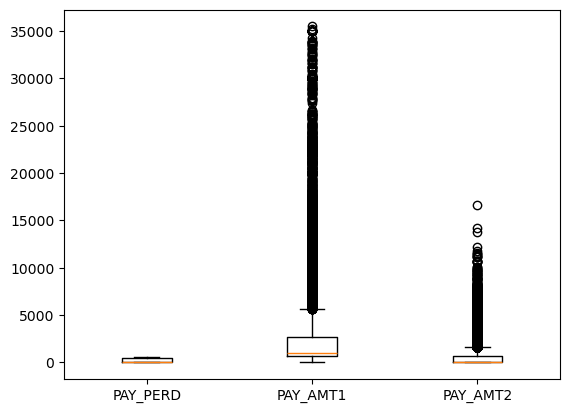

In [812]:
plt.boxplot([df_receipt['PAY_PERD'], df_receipt['PAY_AMT1'], df_receipt['PAY_AMT2']], labels=['PAY_PERD', 'PAY_AMT1', 'PAY_AMT2'])
plt.show()

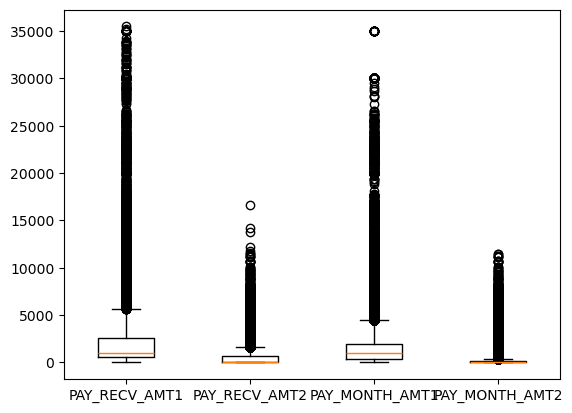

In [813]:
plt.boxplot([df_receipt['PAY_RECV_AMT1'], df_receipt['PAY_RECV_AMT2'], df_receipt['PAY_MONTH_AMT1'], df_receipt['PAY_MONTH_AMT2']], labels=['PAY_RECV_AMT1', 'PAY_RECV_AMT2', 'PAY_MONTH_AMT1', 'PAY_MONTH_AMT2'])
plt.show()

In [814]:
print(df_receipt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35151 entries, 0 to 35150
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PAY_ID             35151 non-null  object 
 1   PAY_MEMB_NO        35151 non-null  object 
 2   PAY_TYPE           35151 non-null  object 
 3   PAY_DOC_NO         35151 non-null  object 
 4   PAY_SAVING_DOC_NO  35151 non-null  int64  
 5   PAY_DATE           35151 non-null  object 
 6   PAY_DUE_DATE       35151 non-null  object 
 7   PAY_OP_CODE1       35151 non-null  object 
 8   PAY_OP_CODE2       35151 non-null  object 
 9   PAY_ACC_NO         35151 non-null  object 
 10  PAY_OLD_SHR        35151 non-null  int64  
 11  PAY_OLD_INT        35151 non-null  int64  
 12  PAY_SAVE_STS       35151 non-null  int64  
 13  PAY_BANK_TYPE      35151 non-null  int64  
 14  PAY_MEMB_DEPT      35151 non-null  int64  
 15  PAY_USER_ID        35151 non-null  int64  
 16  PAY_FINE_AMT       351

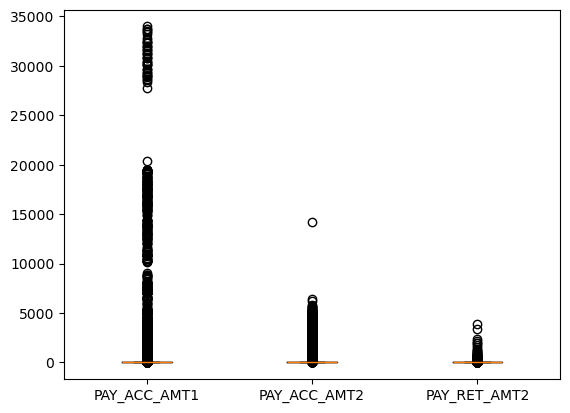

In [815]:
plt.boxplot([df_receipt['PAY_ACC_AMT1'], df_receipt['PAY_ACC_AMT2'], df_receipt['PAY_RET_AMT2']], labels=['PAY_ACC_AMT1', 'PAY_ACC_AMT2', 'PAY_RET_AMT2'])
plt.show()

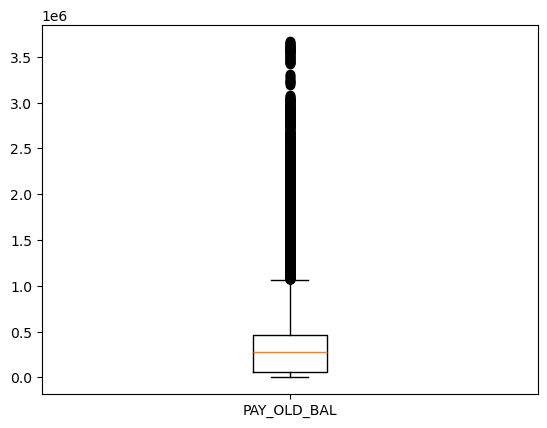

In [816]:
plt.boxplot([df_receipt['PAY_OLD_BAL']], labels=['PAY_OLD_BAL'])
plt.show()

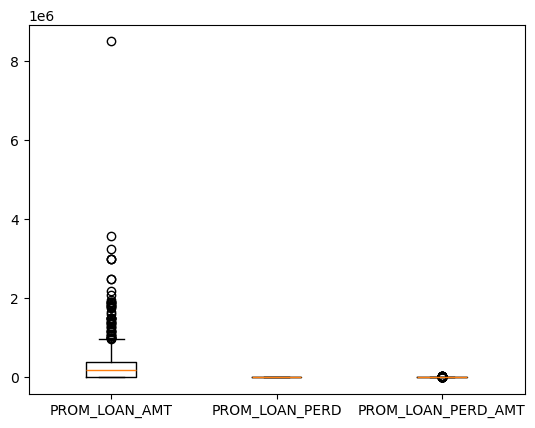

In [817]:
plt.boxplot([df_contract['PROM_LOAN_AMT'], df_contract['PROM_LOAN_PERD'], df_contract['PROM_LOAN_PERD_AMT']], labels=['PROM_LOAN_AMT','PROM_LOAN_PERD','PROM_LOAN_PERD_AMT'])
plt.show()

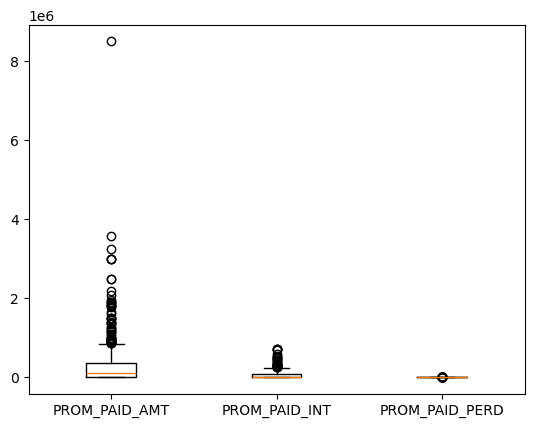

In [818]:
plt.boxplot([df_contract['PROM_PAID_AMT'], df_contract['PROM_PAID_INT'], df_contract['PROM_PAID_PERD']], labels=['PROM_PAID_AMT','PROM_PAID_INT','PROM_PAID_PERD'])
plt.show()

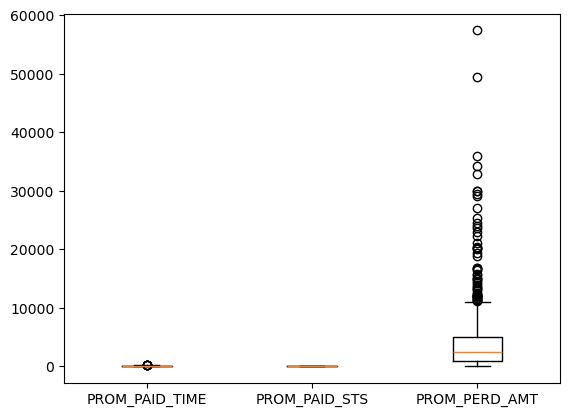

In [819]:
plt.boxplot([df_contract['PROM_PAID_TIME'], df_contract['PROM_PAID_STS'], df_contract['PROM_PERD_AMT']], labels=['PROM_PAID_TIME','PROM_PAID_STS','PROM_PERD_AMT'])
plt.show()

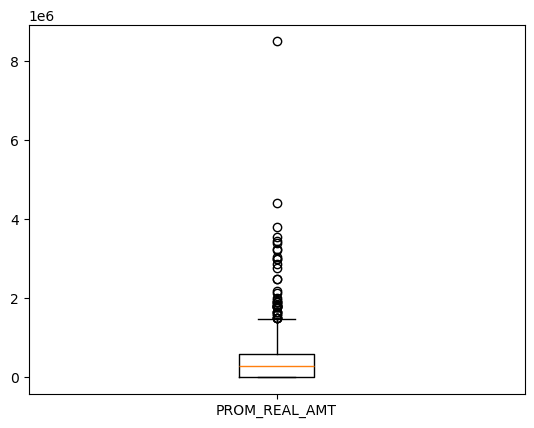

In [820]:
plt.boxplot([df_contract['PROM_REAL_AMT']], labels=['PROM_REAL_AMT'])
plt.show()

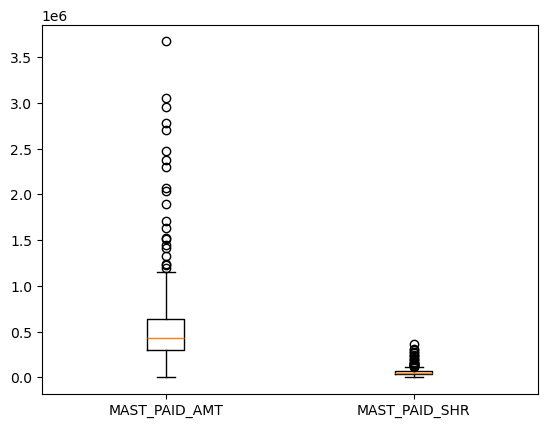

In [821]:
plt.boxplot([df_member['MAST_PAID_AMT'], df_member['MAST_PAID_SHR']], labels=['MAST_PAID_AMT', 'MAST_PAID_SHR'])
plt.show()

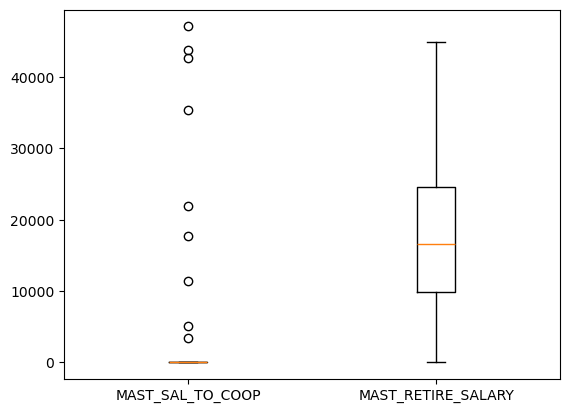

In [822]:
plt.boxplot([df_member['MAST_SAL_TO_COOP'], df_member['MAST_RETIRE_SALARY']], labels=['MAST_SAL_TO_COOP', 'MAST_RETIRE_SALARY'])
plt.show()

In [823]:
mssql = MSSQLConnector(server, database, username, password)
mssql.connect()
mssql.insert_dataframe('clean_receipt', df_receipt)
mssql.insert_dataframe('clean_contract', df_contract)
mssql.insert_dataframe('clean_member', df_member)
mssql.close()

Connection successful
Function 'connect' executed in 0.033834 seconds
Inserted 35151 records into clean_receipt successfully.
Function 'insert_dataframe' executed in 76.380190 seconds
Inserted 500 records into clean_contract successfully.
Function 'insert_dataframe' executed in 1.178108 seconds
Inserted 150 records into clean_member successfully.
Function 'insert_dataframe' executed in 0.666688 seconds
Connection closed
Function 'close' executed in 0.000687 seconds
